In [1]:
# Setting up the Colab environment. DO NOT EDIT!
import os
import warnings
warnings.filterwarnings("ignore")

try:
    import otter

except ImportError:
    ! pip install -q otter-grader==4.0.0
    import otter

if not os.path.exists('walkthrough-tests'):
    zip_files = [f for f in os.listdir() if f.endswith('.zip')]
    assert len(zip_files)>0, 'Could not find any zip files!'
    assert len(zip_files)==1, 'Found multiple zip files!'
    ! unzip {zip_files[0]}

grader = otter.Notebook(colab=True,
                        tests_dir = 'walkthrough-tests')

# Lab

Remember, all assignments are due at 11:59 PM (Philadelphia time) on the Sunday of each instructional week.

## Introduction

This week we will look at data from a cohort of People Living with HIV (PLH) here at Drexel.

As we discussed in the introduction, this data collection effort was done to provide a resource for many projects across the fields of HIV, aging, inflammation, neurocognitive impairment, immune function, and unknowable future projects.
In this lab we will explore a collection of cytokines and chemokines measured by a Luminex panel of common biomarkers of inflammation.

## Learning Objectives
At the end of this learning activity you will be able to:
 - Pratice creating barplots and scatterplots.
 - Employ `DataFrame.corr` to measure the correlation between varaibles.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data = pd.read_csv('cytokine_data.csv')
data.head()

,Sex,Age,isAA,egf,eotaxin,fgfbasic,gcsf,gmcsf,hgf,ifnalpha,...,mig,mip1alpha,mip1beta,tnfalpha,vegf,cocaine_use,cannabinoid_use,neuro_screen_impairment_level,bmi,years_infected
0,Male,53.0,Checked,65.01,170.20,50.32,117.14,2.51,481.37,110.79,...,185.29,104.63,151.15,17.61,7.54,True,True,none,21,18
1,Female,62.0,Checked,232.83,118.23,36.03,215.38,24.53,988.71,66.13,...,397.24,242.10,230.87,51.22,31.60,True,True,none,22,16
2,Male,60.0,Checked,84.84,55.27,13.22,14.08,0.48,364.31,78.67,...,18.63,34.85,68.34,2.48,0.84,False,False,none,25,16
3,Male,62.0,Checked,24.13,70.18,4.12,14.08,1.33,510.36,118.64,...,118.63,113.30,49.15,10.93,3.53,True,True,impaired,29,21
4,Male,54.0,Checked,186.98,69.18,32.56,184.74,12.55,395.87,40.79,...,140.56,131.83,241.00,32.01,10.81,True,True,none,26,16


### Q1: Explore the neurological function of the participants in the dataset.

Create a barplot for the `neuro_screen_impairment_level` level categories.

 - Adjust the y-axis to have a limit of 0 to 150 and the label to Participants
 - Adjust the x-label to Impairement Level

|               |    |
| --------------|----|
| Points        | 2  |
| Public Checks | 5  |
| Hidden Testss | 0  |

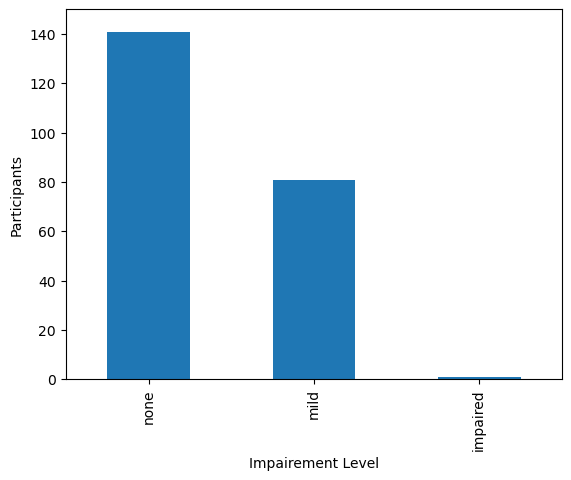

In [4]:
# BEGIN SOLUTION NO PROMPT

# Generate the figure
q1_ax = data["neuro_screen_impairment_level"].value_counts().plot(kind='bar')

# Adjust labels and limits
q1_ax.set_ylim(0, 150)
q1_ax.set_ylabel('Participants')
q1_ax.set_xlabel('Impairement Level')

# END SOLUTION
""" # BEGIN PROMPT

# Generate the figure
q1_ax = ...


# Adjust labels and limits

"""; # END PROMPT

In [5]:
print('Is q1_ax an axis handle:', isinstance(q1_ax, plt.Axes))

Is q1_ax an axis handle: True


In [6]:
print('q1_ax x-label:', q1_ax.get_xlabel())

q1_ax x-label: Impairement Level


In [7]:
print('q1_ax x-ticklabels:', [x.get_text() for x in q1_ax.get_xticklabels()])

q1_ax x-ticklabels: ['none', 'mild', 'impaired']


In [8]:
print('q1_ax y-label:', q1_ax.get_ylabel())

q1_ax y-label: Participants


In [9]:
print('q1_ax ylim:', q1_ax.get_ylim())

q1_ax ylim: (0.0, 150.0)


In [10]:
# DO NOT REMOVE!
plt.close()
# For the grader

### Q2: Consider how pro-inflamatory markers are related to neurological impairment.

Examine the expression of the following cytokines.
 - `tnfalpha`
 - `il6`
 - `mcp1`
 - `mip1alpha`



|               |    |
| --------------|----|
| Points        | 10 |
| Public Checks | 9  |
| Hidden Testss | 1  |

Use `.groupby(...)` to find the mean value of each cytokine for each impairment level.

In [11]:
# BEGIN SOLUTION NO PROMPT

cyto_cols = ['tnfalpha', 'il6', 'mcp1', 'mip1alpha']
q2_cytokine_summary = data.groupby("neuro_screen_impairment_level")[cyto_cols].mean()

# END SOLUTION
""" # BEGIN PROMPT

q2_cytokine_summary = ...

"""; # END PROMPT

Use `.plot(kind = 'box', ...)` to create a set of boxplots for each cytokine split across each `neuro_screen_impairment_level` value.

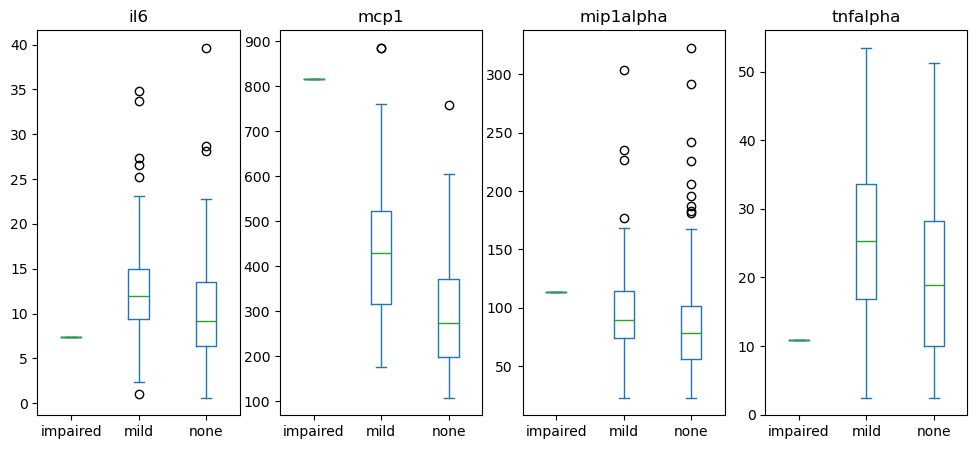

In [12]:
# BEGIN SOLUTION NO PROMPT
ncols = ["neuro_screen_impairment_level"] + cyto_cols
q2_axs = data[ncols].plot(kind = 'box', by = "neuro_screen_impairment_level", figsize=(12, 5))
# END SOLUTION
""" # BEGIN PROMPT

q2_axs = ...

"""; # END PROMPT

Which cytokine has the largest absolute difference in mean expression between `mild` and `none`?

In [13]:
# Answer as a string

q2_ans = 'mcp1' # SOLUTION

In [14]:
print('Is q2_axs a Series:', isinstance(q2_axs, pd.Series))

Is q2_axs a Series: True


In [15]:
print('What is the q2_cytokine_summary index:', sorted(q2_cytokine_summary.index))

What is the q2_cytokine_summary index: ['impaired', 'mild', 'none']


In [16]:
print('What is the q2_cytokine_summary columns:', sorted(q2_cytokine_summary.columns))

What is the q2_cytokine_summary columns: ['il6', 'mcp1', 'mip1alpha', 'tnfalpha']


In [17]:
print('Is q2_axs a Series:', isinstance(q2_axs, pd.Series))

Is q2_axs a Series: True


In [18]:
print('Is q2_axs a Series of axis handles:', all(isinstance(a, plt.Axes) for a in q2_axs.values))

Is q2_axs a Series of axis handles: True


In [19]:
print('q2_axs titles:', sorted((ax.get_title() for ax in q2_axs.values)))

q2_axs titles: ['il6', 'mcp1', 'mip1alpha', 'tnfalpha']


In [20]:
print('q2_axs xticklabels:', sorted(set(tick.get_text() for ax in q2_axs.values for tick in ax.get_xticklabels())))

q2_axs xticklabels: ['impaired', 'mild', 'none']


In [21]:
print('Is q2_ans a string:', isinstance(q2_ans, str))

Is q2_ans a string: True


In [22]:
print('Is q2_ans a cytokine:', q2_ans in data.columns)

Is q2_ans a cytokine: True


In [23]:
# HIDDEN
print('q2_ans =', q2_ans)

q2_ans = mcp1


In [24]:
# DO NOT REMOVE!
plt.close()
# For the grader

### Q3: Hypothesis generation

One advantage of a cohort-style study is that the data can be used to generate new hypotheses to test.
Here, we have collected the cytokine expression of many people along with their BMI.
Use the `.corr()` method to find the correlation between BMI and all cytokines.
Then, generate a hypothesis about which top-5 cytokines are worth a followup.

|               |    |
| --------------|----|
| Points        | 10 |
| Public Checks | 10 |
| Hidden Testss | 3  |

In [25]:
# Calculate the cross correlation matrix that only includes bmi and other cytokines
# BEGIN SOLUTION NO PROMPT
all_cytokines = list(data.columns[3:-5]) + ['bmi'] # SOLUTION
q3_cross_cor = data[all_cytokines].corr() # SOLUTION
# END SOLUTION
""" # BEGIN PROMPT

q3_cross_cor = ...

"""; # END PROMPT

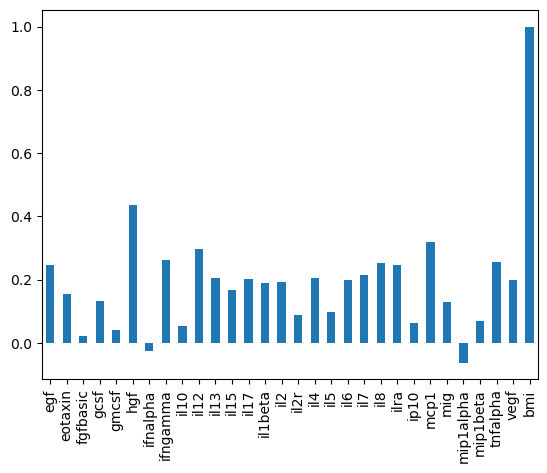

In [26]:
# Plot the correlation between BMI and all other columns

q3_bar_ax = q3_cross_cor['bmi'].plot(kind = 'bar') # SOLUTION

In [27]:
# Extract a Series of the top 5 cytokines 
q3_top5 = q3_cross_cor['bmi'].drop(['bmi']).sort_values().tail() # SOLUTION

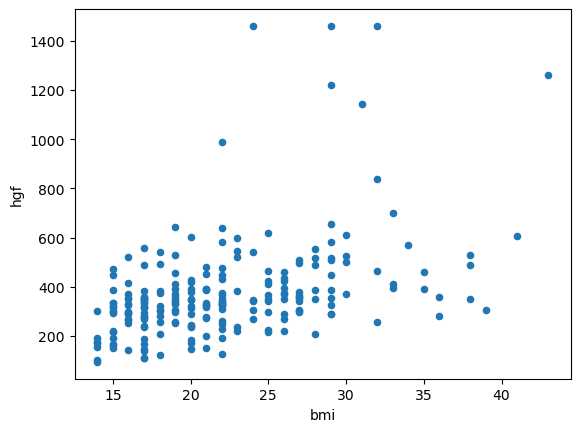

In [28]:
# Create a scatterplot between the bmi (on the x-axis) and the most correlated cytokine (on the y-axis)

q3_scatter_ax = data.plot(kind = 'scatter', x = 'bmi', y = 'hgf') # SOLUTION
# Leave the axes labels as defaults for the grader

In [29]:
print('Is q3_cross_cor a DataFrame:', isinstance(q3_cross_cor, pd.DataFrame))

Is q3_cross_cor a DataFrame: True


In [30]:
print('Is q3_cross_cor.index:', sorted(q3_cross_cor.index))

Is q3_cross_cor.index: ['bmi', 'egf', 'eotaxin', 'fgfbasic', 'gcsf', 'gmcsf', 'hgf', 'ifnalpha', 'ifngamma', 'il10', 'il12', 'il13', 'il15', 'il17', 'il1beta', 'il2', 'il2r', 'il4', 'il5', 'il6', 'il7', 'il8', 'ilra', 'ip10', 'mcp1', 'mig', 'mip1alpha', 'mip1beta', 'tnfalpha', 'vegf']


In [31]:
print(f'q3_cross_cor.sum().sum() = {q3_cross_cor.sum().sum():0.2f}')

q3_cross_cor.sum().sum() = 301.59


In [32]:
print('q3_bar_ax x-taicklabels:', sorted([x.get_text() for x in q3_bar_ax.get_xticklabels()]))

q3_bar_ax x-taicklabels: ['bmi', 'egf', 'eotaxin', 'fgfbasic', 'gcsf', 'gmcsf', 'hgf', 'ifnalpha', 'ifngamma', 'il10', 'il12', 'il13', 'il15', 'il17', 'il1beta', 'il2', 'il2r', 'il4', 'il5', 'il6', 'il7', 'il8', 'ilra', 'ip10', 'mcp1', 'mig', 'mip1alpha', 'mip1beta', 'tnfalpha', 'vegf']


In [33]:
print('q3_bar_ax x-taicklabels:', sorted([x.get_text() for x in q3_bar_ax.get_xticklabels()]))

q3_bar_ax x-taicklabels: ['bmi', 'egf', 'eotaxin', 'fgfbasic', 'gcsf', 'gmcsf', 'hgf', 'ifnalpha', 'ifngamma', 'il10', 'il12', 'il13', 'il15', 'il17', 'il1beta', 'il2', 'il2r', 'il4', 'il5', 'il6', 'il7', 'il8', 'ilra', 'ip10', 'mcp1', 'mig', 'mip1alpha', 'mip1beta', 'tnfalpha', 'vegf']


In [34]:
print('Is q3_top5 a Series:', isinstance(q3_top5, pd.Series))

Is q3_top5 a Series: True


In [35]:
print('Are all q3_top5 cytokines?', len(q3_top5.index.difference(data.columns[3:-5])) == 0)

Are all q3_top5 cytokines? True


In [36]:
print('BMI is not a top cytokine:', 'bmi' not in q3_top5.index)

BMI is not a top cytokine: True


In [37]:
print('Is q3_scatter_ax an Axes handle:', isinstance(q3_scatter_ax, plt.Axes))

Is q3_scatter_ax an Axes handle: True


In [38]:
print('Is q3_scatter_ax xlabel:', q3_scatter_ax.get_xlabel())

Is q3_scatter_ax xlabel: bmi


In [39]:
# HIDDEN
print('q3_top5 cytokines:', sorted(q3_top5.index))

q3_top5 cytokines: ['hgf', 'ifngamma', 'il12', 'mcp1', 'tnfalpha']


In [40]:
# HIDDEN
print('q3_top5 cytokine expressions:', sorted([f'{v:0.3f}' for v in q3_top5.values]))

q3_top5 cytokine expressions: ['0.255', '0.260', '0.297', '0.320', '0.437']


In [41]:
# HIDDEN
print('Is q3_scatter_ax ylabel:', q3_scatter_ax.get_ylabel())

Is q3_scatter_ax ylabel: hgf


In [42]:
# DO NOT REMOVE!
plt.close()
# For the grader

With this information in hand, one could design more directed experiments to further understand whether these correlations are biologically meaningful.
This hypothesis generating technique is useful in a number of ways.

### Q4: Exploration

Use this technique to find correlations between between cytokines and any other demographic variable.

Include at least one barplot of correlation coefficients.
If your variable is categorical, use show a boxplot of the most correlated cytokine.
If your variable is continious, instead show a scatterplot.

With each figure, include a text-box with a figure caption.

There is no grader for this question.

In [43]:
# DO NOT REMOVE!
plt.close()
# For the grader

--------------------------------------------

## Submission

Check:
 - That all tables and graphs are rendered properly.
 - Code completes without errors by using `Restart & Run All`.
 - All checks **pass**.
 
 Then save the notebook and the `File` -> `Download` -> `Download .ipynb`. Upload this file to BBLearn.
